<a href="https://colab.research.google.com/github/aminayusif/EngageIQ/blob/main/EngageIQ_Predictive_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

**EngageIQ** is an intelligent, data-driven marketing analytics project designed to revolutionize how businesses understand and engage with their customers. Powered by supervised and unsupervised machine learning techniques, this project aims to predict user purchase likelihood based on behavioral, engagement, and content interaction data. The core goal is to enable marketing teams to identify high-value prospects and optimize their campaigns using AI-powered insights.

At its foundation, **EngageIQ** uses key engagement metrics such as likes, shares, comments, clicks, time spent on platform, and ad interactions, along with past purchase behavior and exposure to marketing keywords (e.g., “discount,” “exclusive,” “new”) to forecast customer intent. The first phase applies supervised learning models—such as logistic regression, random forest, decision trees and XGBoost—to predict the binary outcome of whether a user is likely to purchase. Evaluation metrics like precision, recall, F1-score, and ROC AUC guide performance assessment, ensuring the model is robust and reliable.

Beyond prediction, the project integrates unsupervised learning techniques like K-Means clustering to segment users based on similarities in engagement and responsiveness to campaigns. This allows businesses to tailor content and outreach strategies for different customer personas, increasing the efficiency of marketing spend.

In future phases, **EngageIQ** will incorporate deep learning models such as neural networks to capture more complex patterns in user behavior. It will also adopt agentic AI principles, deploying intelligent AI agents capable of autonomously analyzing trends, suggesting personalized campaigns, and adapting strategies based on real-time user data. Additionally, generative AI models will be used to dynamically craft personalized marketing messages, ads, or offers based on customer profiles and predicted preferences.

With a scalable design and an emphasis on explainability, **EngageIQ** is not just a machine learning model but a strategic decision-support tool. It enables marketers to shift from reactive to proactive engagement, making data a central driver of innovation and growth.

### Exploratory Data Analysis and Data Preprocessing

#### Import common libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [126]:
data=pd.read_csv('/content/marketing_data.csv')


In [127]:
data.head()

,User_ID,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,...,coupon,deal,discount,exclusive,limited,new,offer,product,sale,shopping
0,1,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,...,0.570089,0.000000,0.000000,0.000000,0.000000,0.000000,0.593544,0.000000,0.000000,0.0
1,2,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,...,0.000000,0.563362,0.000000,0.000000,0.000000,0.000000,0.594854,0.000000,0.000000,0.0
2,3,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,...,0.000000,0.000000,0.491103,0.000000,0.000000,0.489434,0.000000,0.512291,0.000000,0.0
3,4,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,...,0.000000,0.000000,0.562483,0.000000,0.582526,0.000000,0.000000,0.586751,0.000000,0.0
4,5,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,...,0.516121,0.000000,0.000000,0.495195,0.000000,0.000000,0.000000,0.000000,0.473183,0.0


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 500 non-null    int64  
 1   Likes                   500 non-null    float64
 2   Shares                  500 non-null    float64
 3   Comments                500 non-null    float64
 4   Clicks                  500 non-null    float64
 5   Engagement_with_Ads     500 non-null    float64
 6   Time_Spent_on_Platform  500 non-null    float64
 7   Purchase_History        500 non-null    int64  
 8   Engagement_Level        500 non-null    object 
 9   Purchase_Likelihood     500 non-null    int64  
 10  brand                   500 non-null    float64
 11  buy                     500 non-null    float64
 12  coupon                  500 non-null    float64
 13  deal                    500 non-null    float64
 14  discount                500 non-null    fl

In [129]:
data.shape

(500, 22)

Dataset contains 500 rows and 22 columns

Drop the User_ID column has it serves no function

In [130]:
data = data.drop('User_ID', axis=1)
display(data.head())

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,brand,...,coupon,deal,discount,exclusive,limited,new,offer,product,sale,shopping
0,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,0.568071,...,0.570089,0.000000,0.000000,0.000000,0.000000,0.000000,0.593544,0.000000,0.000000,0.0
1,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,0.000000,...,0.000000,0.563362,0.000000,0.000000,0.000000,0.000000,0.594854,0.000000,0.000000,0.0
2,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,0.000000,...,0.000000,0.000000,0.491103,0.000000,0.000000,0.489434,0.000000,0.512291,0.000000,0.0
3,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,0.000000,...,0.000000,0.000000,0.562483,0.000000,0.582526,0.000000,0.000000,0.586751,0.000000,0.0
4,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,0.514294,...,0.516121,0.000000,0.000000,0.495195,0.000000,0.000000,0.000000,0.000000,0.473183,0.0


Check to see if dataset contains any null values

In [131]:
data.isnull().sum()

,0
Likes,0
Shares,0
Comments,0
Clicks,0
Engagement_with_Ads,0
Time_Spent_on_Platform,0
Purchase_History,0
Engagement_Level,0
Purchase_Likelihood,0
brand,0


####  Class Distributions

Target variable is Purchase_Likelihood

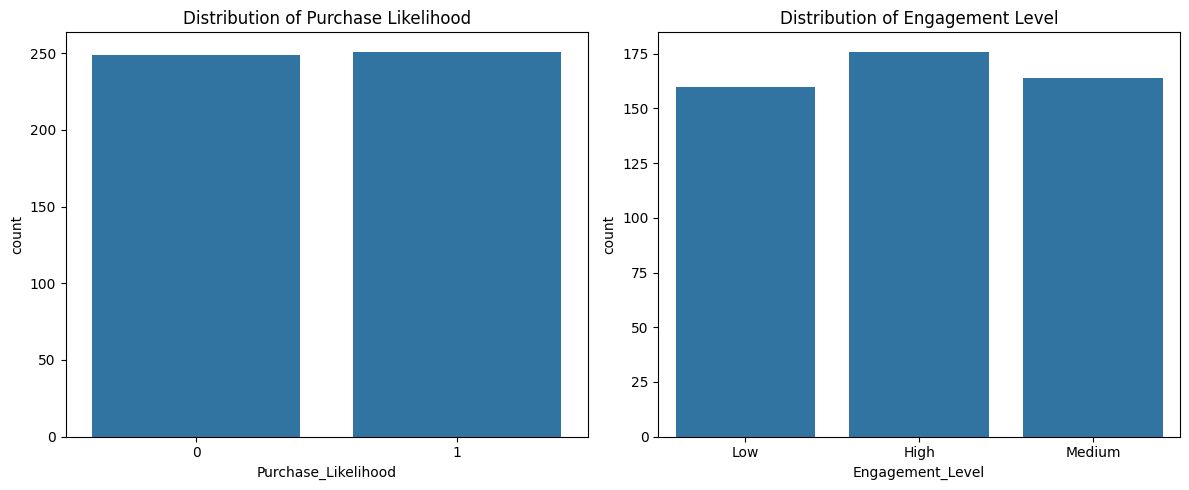

In [132]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Purchase_Likelihood')
plt.title('Distribution of Purchase Likelihood')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Engagement_Level')
plt.title('Distribution of Engagement Level')

plt.tight_layout()
plt.show()

In [133]:
data.describe()

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Purchase_Likelihood,brand,buy,coupon,deal,discount,exclusive,limited,new,offer,product,sale,shopping
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.507096,0.501698,0.495660,0.508080,0.491000,0.492899,0.448000,0.502000,0.133896,0.130936,0.130940,0.136246,0.137452,0.148840,0.133227,0.136710,0.121888,0.130765,0.154044,0.133298
std,0.293279,0.298460,0.275211,0.303279,0.295421,0.288483,0.497787,0.500497,0.254030,0.252307,0.251169,0.254150,0.252878,0.267654,0.258666,0.250267,0.247958,0.255580,0.256113,0.257771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254016,0.231156,0.270000,0.260000,0.233333,0.253356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494980,0.489950,0.500000,0.500000,0.466667,0.466443,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.764056,0.773869,0.720000,0.800000,0.733333,0.733221,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.461313,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.950291,1.000000,1.000000,1.000000,0.893817,1.000000,1.000000,0.876481,0.901117


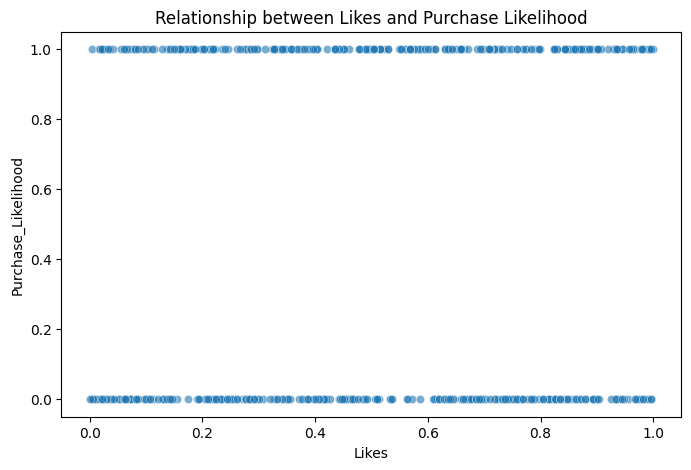

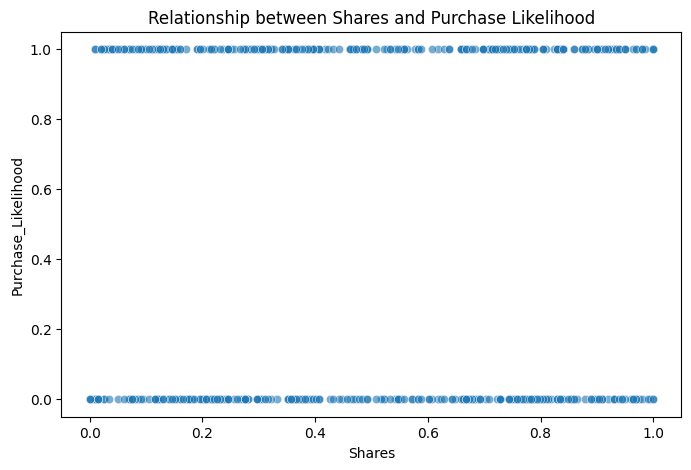

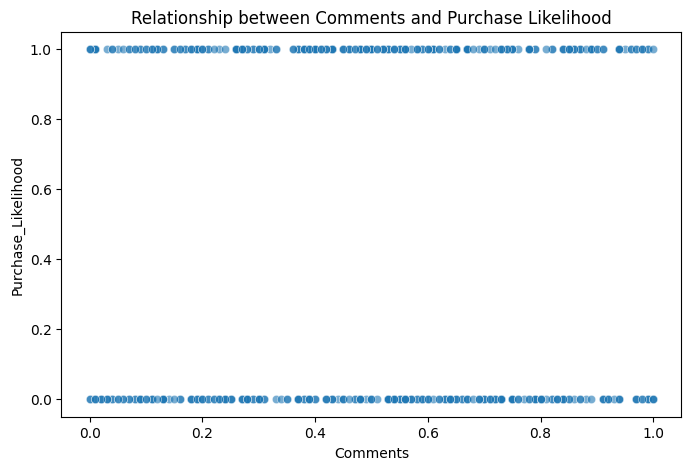

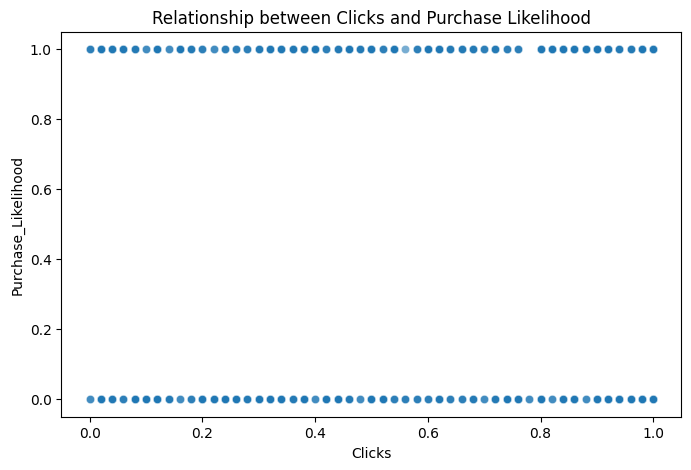

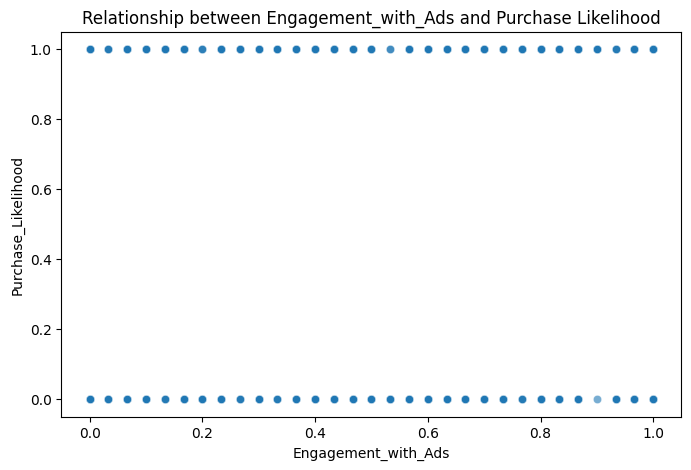

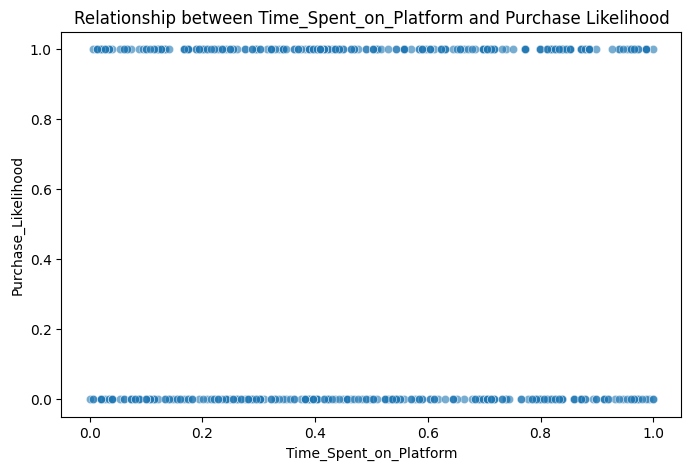

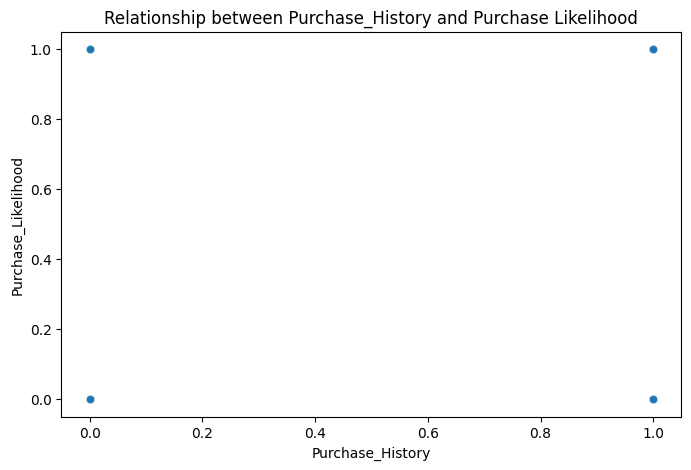

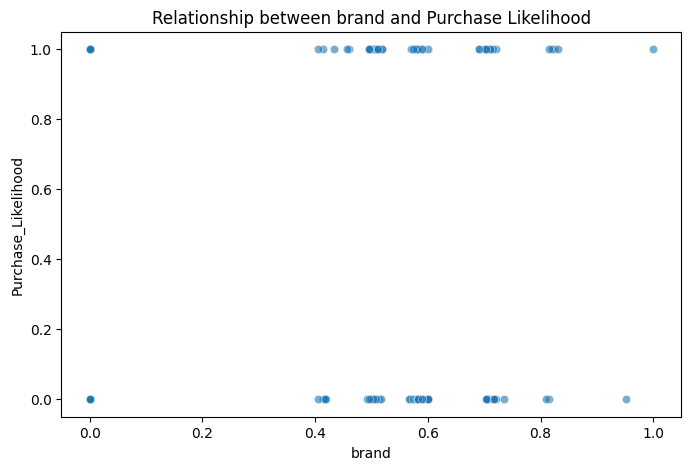

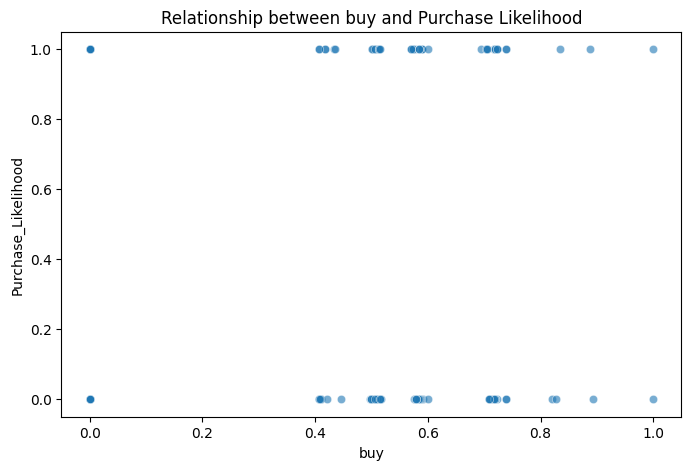

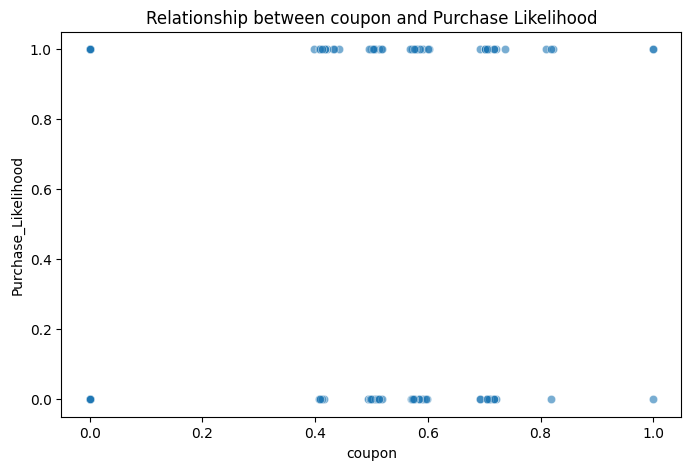

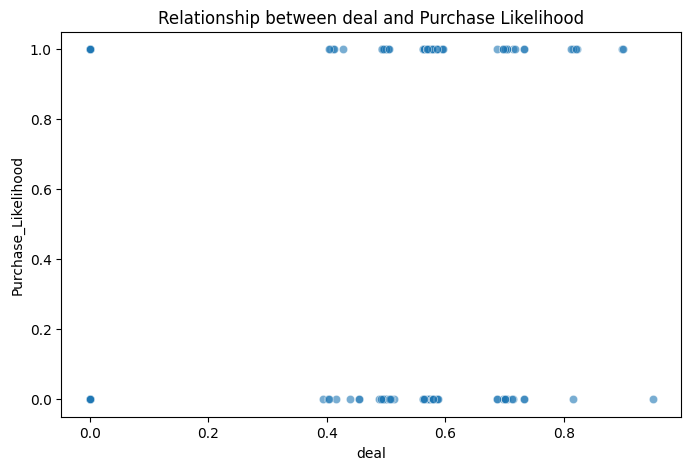

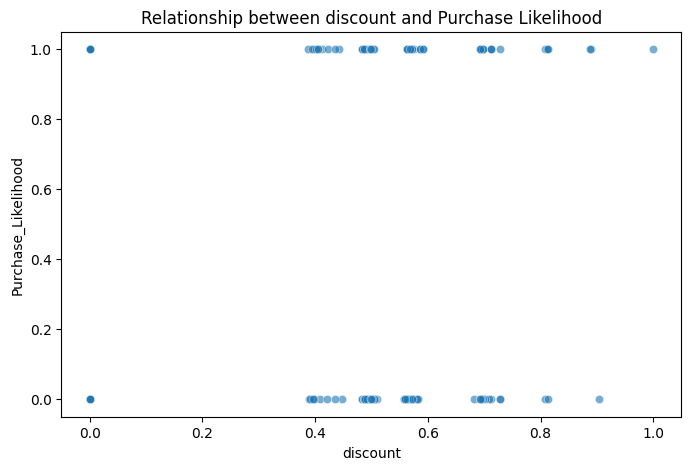

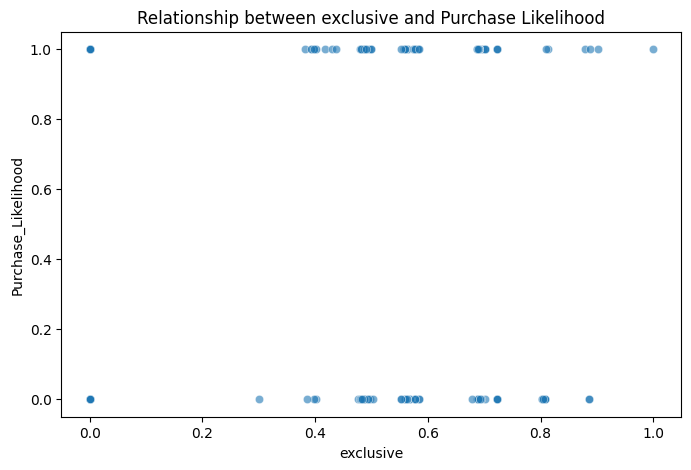

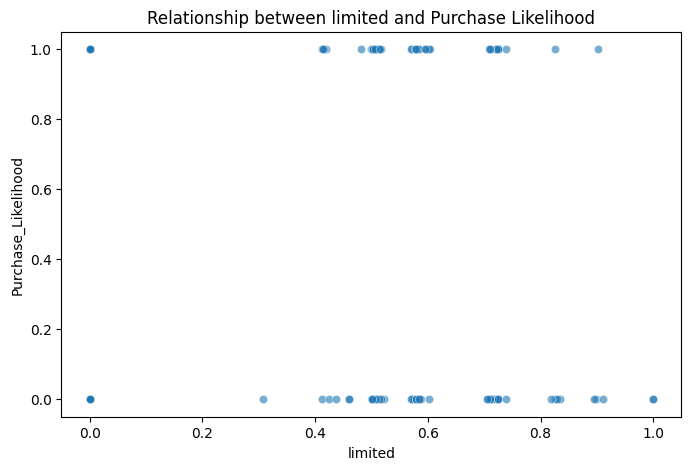

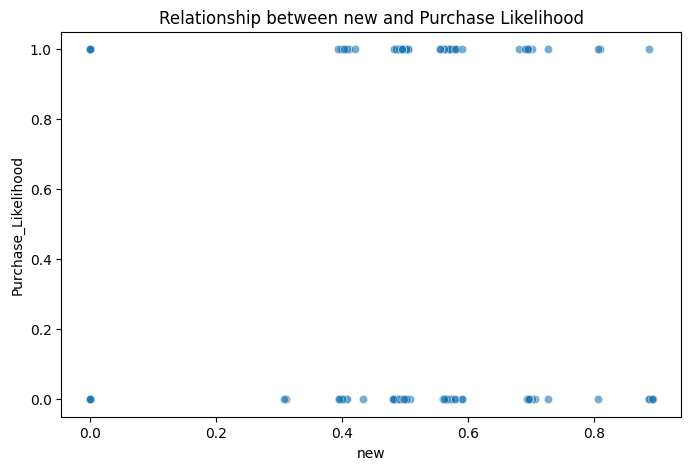

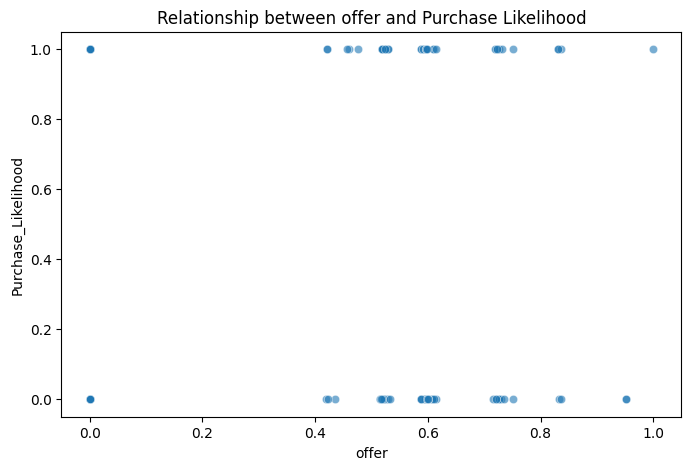

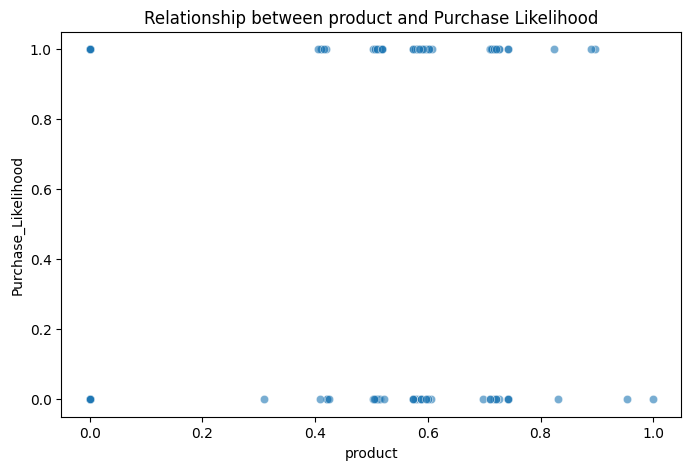

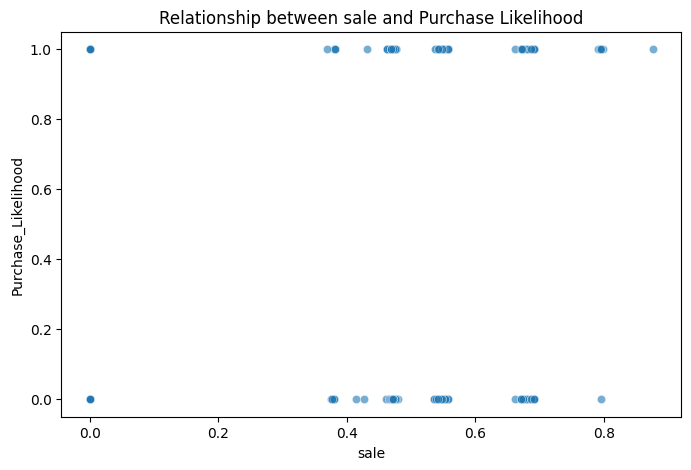

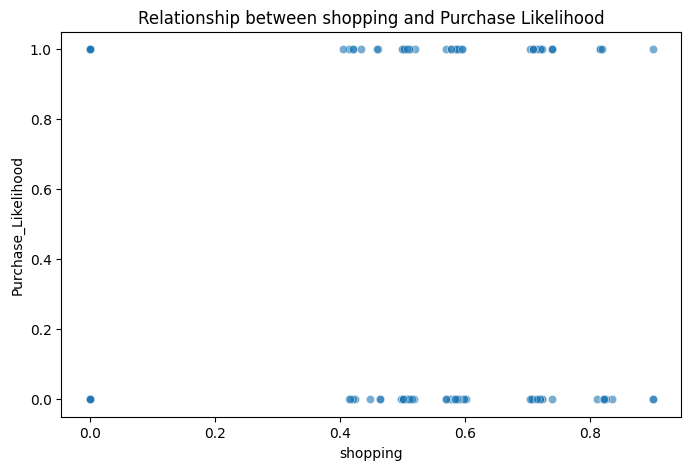

In [134]:
numerical_features = ['Likes', 'Shares', 'Comments', 'Clicks', 'Engagement_with_Ads', 'Time_Spent_on_Platform', 'Purchase_History', 'brand', 'buy', 'coupon', 'deal', 'discount', 'exclusive', 'limited', 'new', 'offer', 'product', 'sale', 'shopping']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=feature, y='Purchase_Likelihood', alpha=0.6)
    plt.title(f'Relationship between {feature} and Purchase Likelihood')
    plt.show()

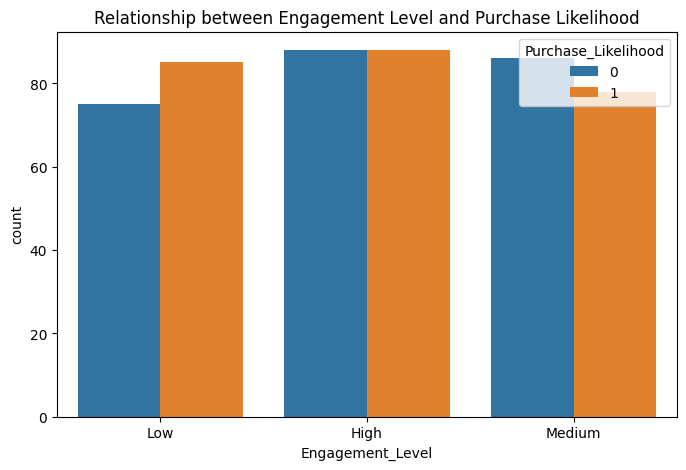

In [135]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Engagement_Level', hue='Purchase_Likelihood')
plt.title('Relationship between Engagement Level and Purchase Likelihood')
plt.show()

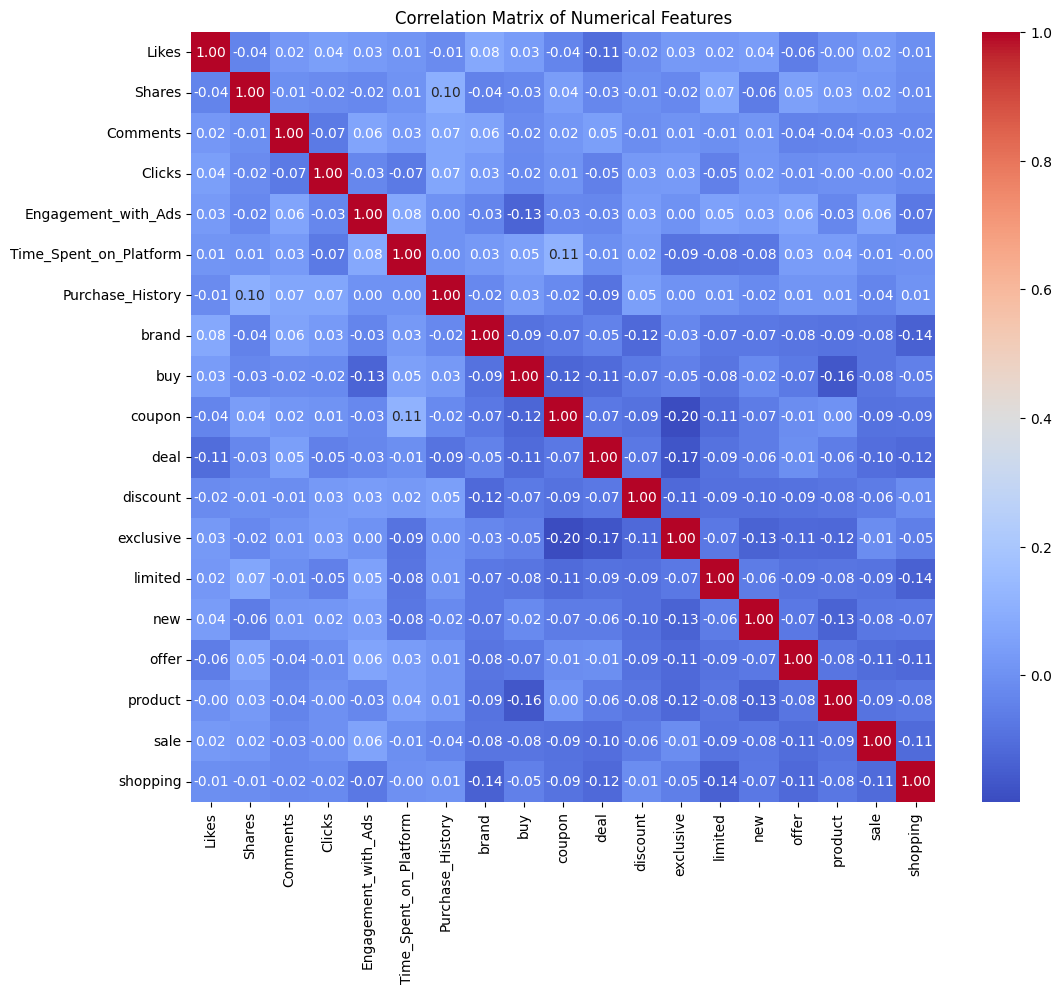

In [136]:
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Most of the numerical features show relatively low linear correlation with each other. The correlation coefficients are generally close to zero.
There are no strong positive or negative correlations (values close to 1 or -1) between any pair of the numerical features.
This suggests that there is not significant multicollinearity among these numerical features, which is generally good for many machine learning models.

### Feature Engineering

#### Behavioral Aggregations

1. Total_Engagement

In [137]:
data['Total_Engagement'] = data['Likes'] + data['Shares'] + data['Comments'] + data['Clicks']

2. Engagement Ratio

In [138]:
data['Engagement_Ratio'] = data['Total_Engagement'] / (data['Time_Spent_on_Platform'] + 1e-5)

3. Click Through Ratio

In [139]:
data['Click_Through_Ratio'] = data['Clicks'] / (data['Likes'] + data['Shares'] + data['Comments'] + 1e-5)

4. Ad Engagement Rate

In [140]:
data['Ad_Engagement_Rate'] = data['Engagement_with_Ads'] / (data['Time_Spent_on_Platform'] + 1e-5)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Likes                   500 non-null    float64
 1   Shares                  500 non-null    float64
 2   Comments                500 non-null    float64
 3   Clicks                  500 non-null    float64
 4   Engagement_with_Ads     500 non-null    float64
 5   Time_Spent_on_Platform  500 non-null    float64
 6   Purchase_History        500 non-null    int64  
 7   Engagement_Level        500 non-null    object 
 8   Purchase_Likelihood     500 non-null    int64  
 9   brand                   500 non-null    float64
 10  buy                     500 non-null    float64
 11  coupon                  500 non-null    float64
 12  deal                    500 non-null    float64
 13  discount                500 non-null    float64
 14  exclusive               500 non-null    fl

In [142]:
data.head()

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,brand,...,limited,new,offer,product,sale,shopping,Total_Engagement,Engagement_Ratio,Click_Through_Ratio,Ad_Engagement_Rate
0,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,0.568071,...,0.000000,0.000000,0.593544,0.000000,0.000000,0.0,1.474868,1.604036,0.214013,0.797558
1,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,0.000000,...,0.000000,0.000000,0.594854,0.000000,0.000000,0.0,2.593778,3.716032,0.399183,0.668580
2,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,0.000000,...,0.000000,0.489434,0.000000,0.512291,0.000000,0.0,1.749148,9.307473,0.073658,0.000000
3,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,0.000000,...,0.582526,0.000000,0.000000,0.586751,0.000000,0.0,2.020252,2.280411,0.603049,0.564388
4,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,0.514294,...,0.000000,0.000000,0.000000,0.000000,0.473183,0.0,1.918846,2.165946,0.246937,0.790143


#### Content Affinity Index

5. Promotion Affinity


>  Indicates how responsive a user might be to marketing stimuli



In [143]:
promotion_cols = ['brand', 'buy', 'coupon', 'deal', 'discount', 'exclusive',
                  'limited', 'new', 'offer', 'product', 'sale', 'shopping']

data['Promotion_Affinity'] = data[promotion_cols].sum(axis=1)

6. Promotion Category Count


> Count of promotion columns with values above a threshold (e.g., 0.5)



In [144]:
data['Promotion_Category_Count'] = (data[promotion_cols] > 0.5).sum(axis=1)


In [145]:
data.head()

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,brand,...,offer,product,sale,shopping,Total_Engagement,Engagement_Ratio,Click_Through_Ratio,Ad_Engagement_Rate,Promotion_Affinity,Promotion_Category_Count
0,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,0.568071,...,0.593544,0.000000,0.000000,0.0,1.474868,1.604036,0.214013,0.797558,1.731703,3
1,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,0.000000,...,0.594854,0.000000,0.000000,0.0,2.593778,3.716032,0.399183,0.668580,1.731602,3
2,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,0.000000,...,0.000000,0.512291,0.000000,0.0,1.749148,9.307473,0.073658,0.000000,1.999612,2
3,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,0.000000,...,0.000000,0.586751,0.000000,0.0,2.020252,2.280411,0.603049,0.564388,1.731760,3
4,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,0.514294,...,0.000000,0.000000,0.473183,0.0,1.918846,2.165946,0.246937,0.790143,1.998794,2


#### Activity Flags

7. Recent Activity Flag



> Time_Spent_on_Platform > threshold (e.g., 0.75) — binary feature.



In [146]:
data['Recent_Activity_Flag'] = (data['Time_Spent_on_Platform'] > 0.75).astype(int)

8. High Engagement Flag

In [147]:
engagement_threshold = data['Total_Engagement'].quantile(0.75)
data['High_Engagement_Flag'] = (data['Total_Engagement'] > engagement_threshold).astype(int)

In [148]:
data.head()

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,brand,...,sale,shopping,Total_Engagement,Engagement_Ratio,Click_Through_Ratio,Ad_Engagement_Rate,Promotion_Affinity,Promotion_Category_Count,Recent_Activity_Flag,High_Engagement_Flag
0,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,0.568071,...,0.000000,0.0,1.474868,1.604036,0.214013,0.797558,1.731703,3,1,0
1,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,0.000000,...,0.000000,0.0,2.593778,3.716032,0.399183,0.668580,1.731602,3,0,1
2,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,0.000000,...,0.000000,0.0,1.749148,9.307473,0.073658,0.000000,1.999612,2,0,0
3,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,0.000000,...,0.000000,0.0,2.020252,2.280411,0.603049,0.564388,1.731760,3,1,0
4,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,0.514294,...,0.473183,0.0,1.918846,2.165946,0.246937,0.790143,1.998794,2,1,0


#### Interaction Terms

9. Time Likes Interaction

In [149]:
data['Time_Likes_Interaction'] = data['Time_Spent_on_Platform'] * data['Likes']

10. Ad Click Effectiveness

In [150]:
data['Ad_Click_Effectiveness'] = data['Engagement_with_Ads'] * data['Clicks']

In [151]:
data.head()

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,brand,...,Total_Engagement,Engagement_Ratio,Click_Through_Ratio,Ad_Engagement_Rate,Promotion_Affinity,Promotion_Category_Count,Recent_Activity_Flag,High_Engagement_Flag,Time_Likes_Interaction,Ad_Click_Effectiveness
0,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,0.568071,...,1.474868,1.604036,0.214013,0.797558,1.731703,3,1,0,0.005539,0.190667
1,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,0.000000,...,2.593778,3.716032,0.399183,0.668580,1.731602,3,0,1,0.587262,0.345333
2,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,0.000000,...,1.749148,9.307473,0.073658,0.000000,1.999612,2,0,0,0.159241,0.000000
3,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,0.000000,...,2.020252,2.280411,0.603049,0.564388,1.731760,3,1,0,0.619067,0.380000
4,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,0.514294,...,1.918846,2.165946,0.246937,0.790143,1.998794,2,1,0,0.485647,0.266000


#### Purchase Categorization

11. Purchase History Category

In [152]:
data['Purchase_History_Category'] = pd.cut(
    data['Purchase_History'],
    bins=[-1, 0, 2, float('inf')],
    labels=['New', 'Occasional', 'Frequent']
)

In [153]:
data.head()

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,brand,...,Engagement_Ratio,Click_Through_Ratio,Ad_Engagement_Rate,Promotion_Affinity,Promotion_Category_Count,Recent_Activity_Flag,High_Engagement_Flag,Time_Likes_Interaction,Ad_Click_Effectiveness,Purchase_History_Category
0,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,0.568071,...,1.604036,0.214013,0.797558,1.731703,3,1,0,0.005539,0.190667,New
1,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,0.000000,...,3.716032,0.399183,0.668580,1.731602,3,0,1,0.587262,0.345333,New
2,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,0.000000,...,9.307473,0.073658,0.000000,1.999612,2,0,0,0.159241,0.000000,Occasional
3,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,0.000000,...,2.280411,0.603049,0.564388,1.731760,3,1,0,0.619067,0.380000,New
4,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,0.514294,...,2.165946,0.246937,0.790143,1.998794,2,1,0,0.485647,0.266000,Occasional


In [154]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Likes                      500 non-null    float64 
 1   Shares                     500 non-null    float64 
 2   Comments                   500 non-null    float64 
 3   Clicks                     500 non-null    float64 
 4   Engagement_with_Ads        500 non-null    float64 
 5   Time_Spent_on_Platform     500 non-null    float64 
 6   Purchase_History           500 non-null    int64   
 7   Engagement_Level           500 non-null    object  
 8   Purchase_Likelihood        500 non-null    int64   
 9   brand                      500 non-null    float64 
 10  buy                        500 non-null    float64 
 11  coupon                     500 non-null    float64 
 12  deal                       500 non-null    float64 
 13  discount                   500 non-

 It's best to create these new features for feature engineering before encoding and scaling. This ensures that the new features are also properly transformed along with the original features. If you were to scale or encode first, the feature engineering process might introduce inconsistencies or unintended biases.

### Data Preprocessing

#### One-Hot Encoding for Categorical Features

In [155]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Engagement_Level', 'Purchase_History_Category']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

display(data_encoded.head())

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Purchase_Likelihood,brand,buy,...,Promotion_Affinity,Promotion_Category_Count,Recent_Activity_Flag,High_Engagement_Flag,Time_Likes_Interaction,Ad_Click_Effectiveness,Engagement_Level_Low,Engagement_Level_Medium,Purchase_History_Category_Occasional,Purchase_History_Category_Frequent
0,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,0,0.568071,0.000000,...,1.731703,3,1,0,0.005539,0.190667,True,False,False,False
1,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,1,0.000000,0.573387,...,1.731602,3,0,1,0.587262,0.345333,False,False,False,False
2,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,1,0.000000,0.506783,...,1.999612,2,0,0,0.159241,0.000000,True,False,True,False
3,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,1,0.000000,0.000000,...,1.731760,3,1,0,0.619067,0.380000,False,False,False,False
4,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,1,0.514294,0.000000,...,1.998794,2,1,0,0.485647,0.266000,True,False,True,False


#### Numerical Scaling for Numerical Features

In [156]:
from sklearn.preprocessing import StandardScaler

numerical_features = data_encoded.select_dtypes(include=np.number).columns.tolist()
# Exclude the target variable if it's in the numerical features list
if 'Purchase_Likelihood' in numerical_features:
    numerical_features.remove('Purchase_Likelihood')

scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

display(data_encoded.head())

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Purchase_Likelihood,brand,buy,...,Promotion_Affinity,Promotion_Category_Count,Recent_Activity_Flag,High_Engagement_Flag,Time_Likes_Interaction,Ad_Click_Effectiveness,Engagement_Level_Low,Engagement_Level_Medium,Purchase_History_Category_Occasional,Purchase_History_Category_Frequent
0,-1.710228,0.895978,-0.202448,-0.818813,0.821120,1.480125,-0.900885,0,1.710859,-0.519473,...,0.427863,1.170328,1.769811,-0.577350,-1.093154,-0.247079,True,False,False,False
1,1.140906,-0.064685,0.124902,0.765475,-0.082451,0.711628,-0.900885,1,-0.527613,1.755374,...,0.427445,1.170328,-0.565032,1.732051,1.496515,0.436599,False,False,False,False
2,1.161467,-0.502882,-0.238820,-1.280897,-1.663700,-1.058244,1.110019,1,-0.527613,1.491133,...,1.535780,-0.153572,-0.565032,-0.577350,-0.408915,-1.089888,True,False,True,False
3,0.654294,-0.705126,-0.820775,0.831487,0.030496,1.363686,-0.900885,1,-0.527613,-0.519473,...,0.428096,1.170328,1.769811,-0.577350,1.638102,0.589837,False,False,False,False
4,0.140268,-1.244446,1.325185,-0.422741,0.708174,1.363686,1.110019,1,1.498954,-0.519473,...,1.532395,-0.153572,1.769811,-0.577350,1.044155,0.085919,True,False,True,False


### Model Selection and Training

In the Model Selection & Training phase, we will perform the following:

Train a classifier (e.g., Random Forest, Logistic Regression, Decision Trees and XGBoost)

Evaluate using Precision, Recall, and F1 Score from the classification_report

#### Data Splitting

In [157]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Purchase_Likelihood', axis=1)
y = data_encoded['Purchase_Likelihood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (400, 33)
Testing set shape: (100, 33)


Train and evaluate Logistic Regression, Decision Tree, and XGBoost models on the preprocessed data. Compare their performance and suggest the next steps.

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models and their parameter grids for tuning
models = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(random_state=42),
        'param_grid': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(random_state=42),
        'param_grid': {
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': 'Support Vector Machine',
        'model': SVC(random_state=42, probability=True), # probability=True is needed for roc_auc_score
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
]

# Dictionary to store results
results = {}

# Iterate through models, perform tuning, and evaluate
for model_info in models:
    name = model_info['name']
    model = model_info['model']
    param_grid = model_info['param_grid']

    print(f"Tuning {name}...")

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5, n_jobs=-1)

    # Fit GridSearchCV to training data
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])


    # Store results
    results[name] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

    print(f"{name} Tuning Complete.\n")

# Display results
results_df = pd.DataFrame(results).T
display(results_df)

Tuning Logistic Regression...
Logistic Regression Tuning Complete.

Tuning Decision Tree...
Decision Tree Tuning Complete.

Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:45:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Tuning Complete.

Tuning Random Forest...
Random Forest Tuning Complete.

Tuning Support Vector Machine...
Support Vector Machine Tuning Complete.



,Best Parameters,Accuracy,Precision,Recall,F1-score,ROC AUC
Logistic Regression,"{'C': 0.1, 'solver': 'lbfgs'}",0.49,0.490566,0.52,0.504854,0.4456
Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.54,0.552632,0.42,0.477273,0.5122
XGBoost,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.45,0.428571,0.3,0.352941,0.484
Random Forest,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.46,0.465517,0.54,0.5,0.4644
Support Vector Machine,"{'C': 0.1, 'kernel': 'rbf'}",0.5,0.5,1.0,0.666667,0.5492


### Model Evaluation Visualizations

#### ROC AUC Curves

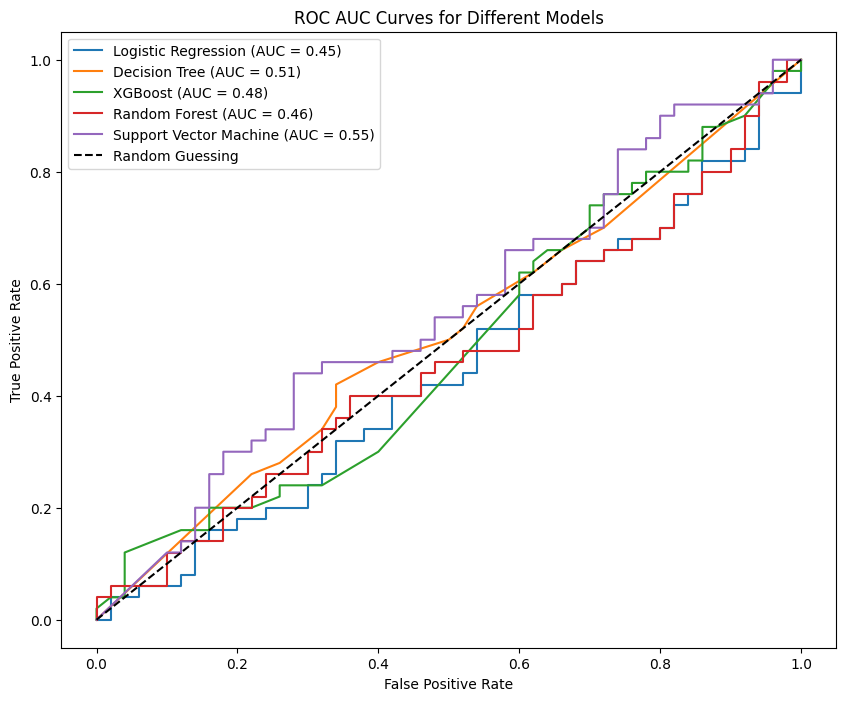

In [159]:
plt.figure(figsize=(10, 8))

for name, model in fitted_models.items():
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    else:
        print(f"Model {name} does not have predict_proba. Skipping ROC AUC curve.")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves for Different Models')
plt.legend()
plt.show()

#### Feature Importance (for tree-based models)

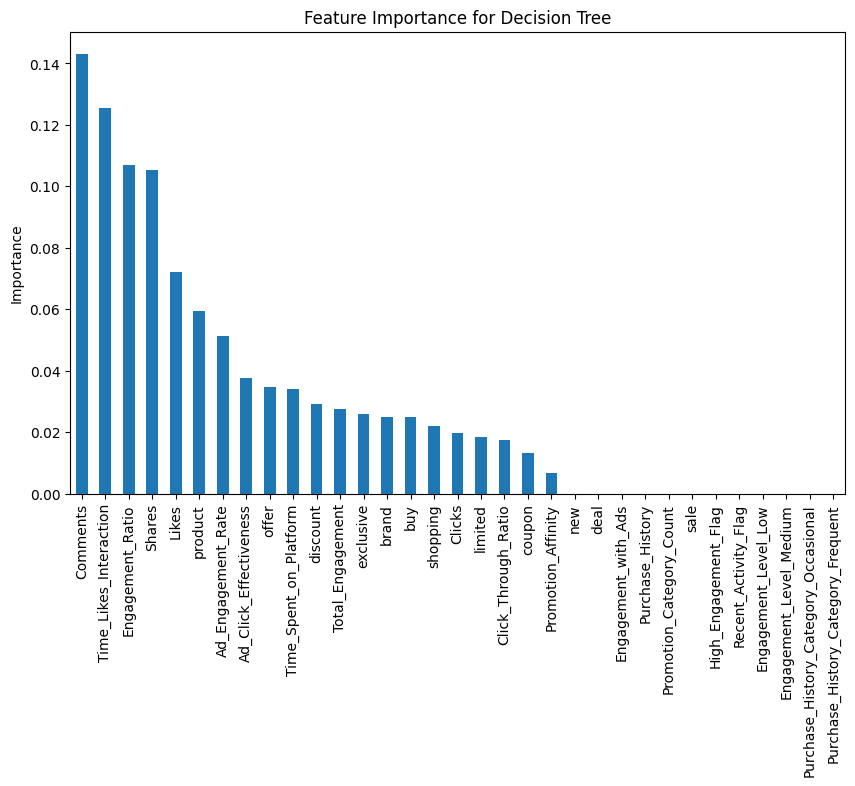

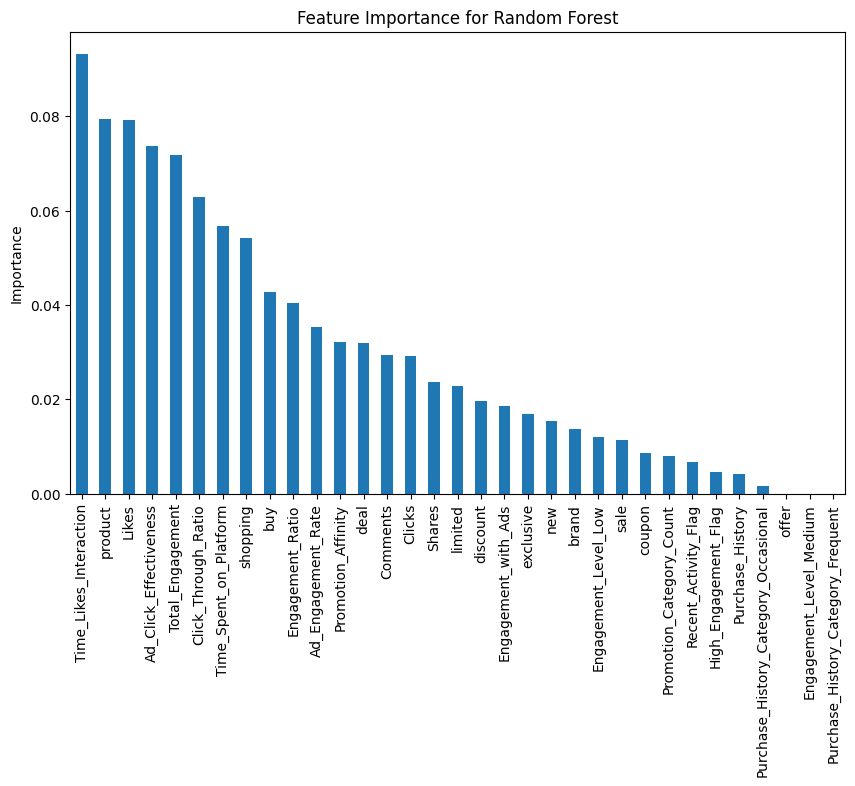

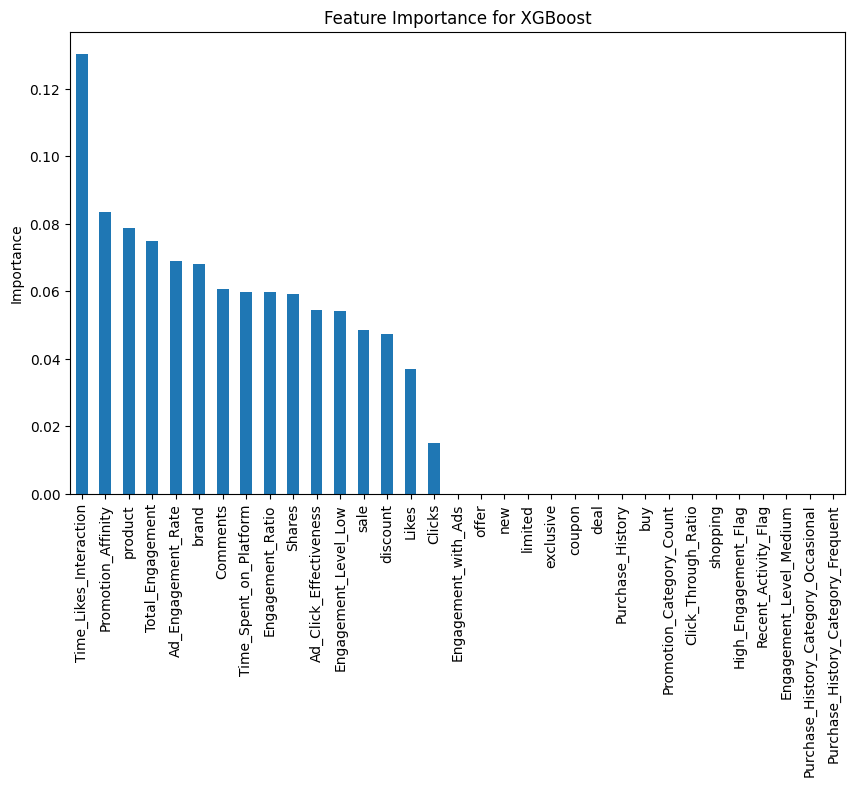

In [160]:
tree_models = ['Decision Tree', 'Random Forest', 'XGBoost']

for name in tree_models:
    if name in fitted_models:
        model = fitted_models[name]
        if hasattr(model, 'feature_importances_'):
            importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

            plt.figure(figsize=(10, 6))
            importances.plot(kind='bar')
            plt.title(f'Feature Importance for {name}')
            plt.ylabel('Importance')
            plt.show()
        else:
            print(f"Model {name} does not have feature_importances_ attribute.")

#### Classification Report

In [161]:
for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.49      0.46      0.47        50
           1       0.49      0.52      0.50        50

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100

--------------------------------------------------
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.53      0.66      0.59        50
           1       0.55      0.42      0.48        50

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.53       100
weighted avg       0.54      0.54      0.53       100

--------------------------------------------------
Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.46      0.60      0.52        50
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
